<a href="https://colab.research.google.com/github/Alpha-Male-Dennis/4792_Data-Mining-Group-18/blob/main/CSC_4792_Project_G18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## Problem Statement

The Journal of Natural and Applied Sciences (JONAS) publishes multidisciplinary research articles across various disciplines, including environmental science, agriculture, mining, engineering, and water resources. Manually categorizing these articles into their respective disciplines based on titles and abstracts is time-consuming and subjective. An automated classification model is needed to accurately assign articles to their relevant disciplines using natural language processing (NLP) and machine learning techniques.

## Business Objectives

The primary business objectives are:

1. Efficient Article Classification – Automate the categorization of journal articles to streamline editorial workflows.
2. Improved Discoverability – Enhance search and retrieval of articles by discipline for researchers and readers.
3. Reduced Manual Effort – Minimize the need for manual tagging by editors, reducing human error and workload.

## Success Criteria
* The model should correctly classify articles into predefined disciplines with high accuracy.
* The solution should be scalable to handle new articles as the journal continues publishing.
* The classification system should be interpretable, allowing editors to verify and adjust categories if needed.

## Data Mining Goals

* Text Preprocessing – Clean and preprocess article titles and abstracts (tokenization, stopword removal, stemming/lemmatization).
* Feature Extraction – Convert text into numerical features using techniques like TF-IDF or word embeddings (Word2Vec, GloVe).
* Model Development – Implement a supervised classification model (e.g., Naïve Bayes, SVM, Random Forest, or Neural Networks) to predict article disciplines.
* Evaluation – Assess model performance using metrics such as accuracy, precision, recall, and F1-score.

## Initial Project Success Criteria

* Accuracy: The model should achieve at least 85% accuracy in classifying articles into the correct discipline.
* Interpretability: The model should provide explainable predictions (e.g., feature importance in decision-making).
* Scalability: The solution should handle new, unseen articles without significant performance degradation.

# 2. Data Understanding

## First mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.1 Load Raw Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/JONAS Dataset/journal_articles_final.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## 2.2 Initial Data Exploration

### Inspection

In [3]:
# Display the first 5 rows
print("First 5 rows:")
display(df.head())

# Dataset shape (number of articles, columns)
print("\nDataset shape:", df.shape)

# Column names and data types
print("\nData types and non-null counts:")
display(df.info())

# Summary statistics for numerical columns (if any)
print("\nSummary statistics:")
display(df.describe(include='all'))

First 5 rows:


,article_id,title,abstract,keywords,discipline,year,volume
0,374-Article Text-1371-1-10-20201218,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,Insolation models have been recognized for man...,"Solar Radiation, Regression Analysis, Extrater...",Engineering,2020,4
1,376-Article Text-1364-1-10-20201218,OPERATION STRATEGY FOR WATER SUPPLY SERVICE DE...,Access to safe and affordable drinking water i...,"Operations Strategy, Competency, Cost, Quality...",Agriculture,2020,4
2,371-Article Text-1361-1-10-20201218,A SKILLS MEASUREMENT FRAMEWORK FOR THE CONSTRU...,Construction is characterised as being labour ...,"skills mismatch, construction, skill competency",Engineering,2020,4
3,378-Article Text-1377-1-10-20201218,FACTORS AFFECTING THE MAIN CONTRACTOR-SUBCONTR...,In recent years there has been a substantial n...,"Construction Indusry, Main contractor, Subcont...",Engineering,2020,4
4,379-Article Text-1378-1-10-20201218,DISPOSAL OF USED FUMIGANT CONTAINERS IN ZAMBIA...,Fumigation involves the use of a highly toxic ...,"Disposal, Fumigant, Containers.",Environmental Science,2020,4



Dataset shape: (47, 7)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  47 non-null     object
 1   title       47 non-null     object
 2   abstract    46 non-null     object
 3   keywords    43 non-null     object
 4   discipline  47 non-null     object
 5   year        47 non-null     int64 
 6   volume      47 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ KB


None


Summary statistics:


,article_id,title,abstract,keywords,discipline,year,volume
count,47,47,46,43,47,47.000000,47.000000
unique,47,47,46,43,10,NaN,NaN
top,374-Article Text-1371-1-10-20201218,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,Insolation models have been recognized for man...,"Solar Radiation, Regression Analysis, Extrater...",Engineering,NaN,NaN
freq,1,1,1,1,26,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018.468085,2.617021
std,NaN,NaN,NaN,NaN,NaN,3.006161,1.467817
min,NaN,NaN,NaN,NaN,NaN,2014.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,2019.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,2021.000000,4.000000


### Discipline Distribution (Bar Chart)

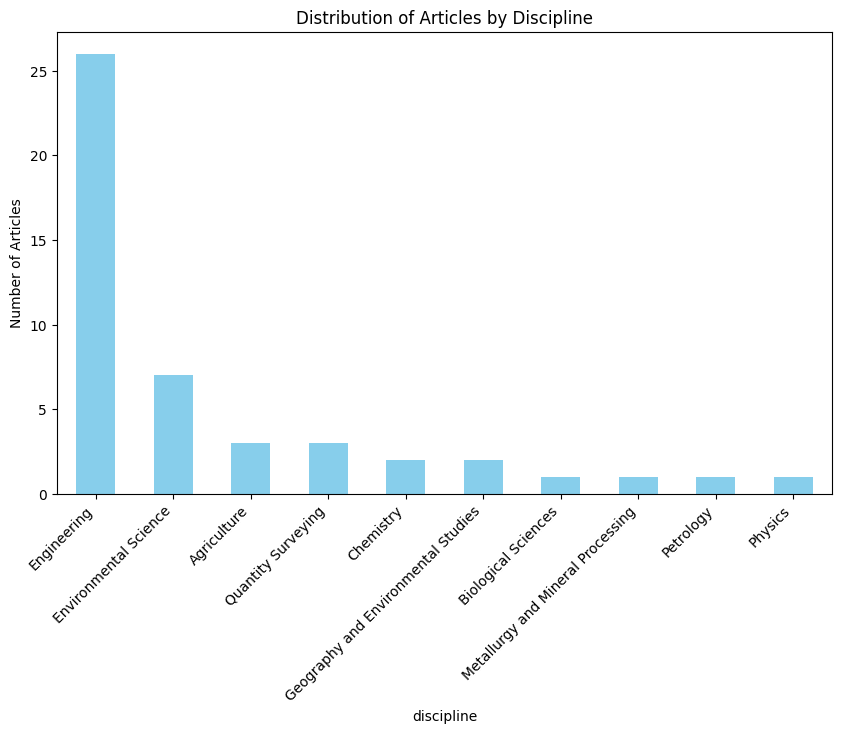

In [4]:
import matplotlib.pyplot as plt

# Plot distribution of disciplines
plt.figure(figsize=(10, 6))
df['discipline'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles by Discipline')
plt.xlabel('discipline')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()